In [1]:
def DFT(x):
    """Function to calculate the discrete Fourier Transform of a 1D real-valued signal x"""

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)

    X = np.dot(e, x)

    return X

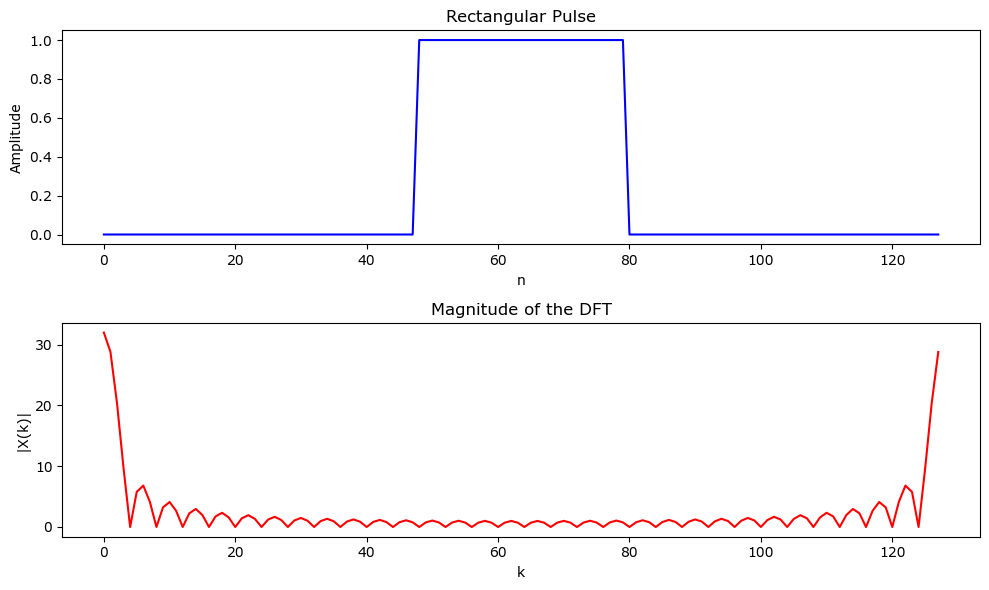

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the rectangular function
def rectangular_pulse(N, width):
    x = np.zeros(N)
    start = (N - width) // 2
    end = start + width
    x[start:end] = 1
    return x


# Parameters
N = 128  # Number of points in the signal
width = 32  # Width of the rectangular pulse

# Create the rectangular pulse
x = rectangular_pulse(N, width)

# Compute the DFT
X = DFT(x)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot the rectangular pulse
axs[0].plot(np.arange(N), x, 'b')
axs[0].set_title('Rectangular Pulse')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Amplitude')

# Plot the magnitude of the DFT
axs[1].plot(np.arange(N), np.abs(X), 'r')
axs[1].set_title('Magnitude of the DFT')
axs[1].set_xlabel('k')
axs[1].set_ylabel('|X(k)|')

plt.tight_layout()
plt.show()


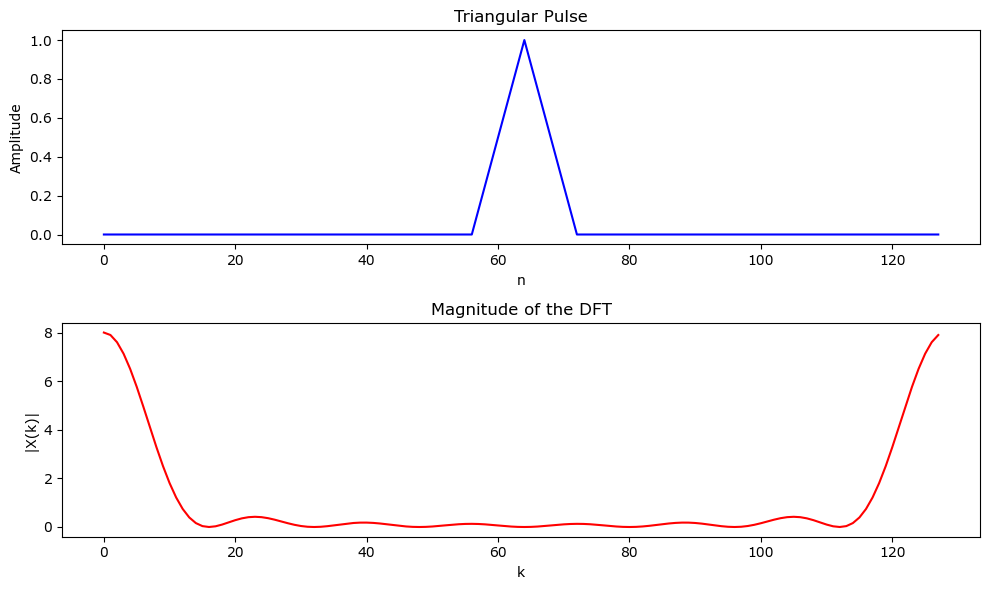

In [3]:
# Define the triangular function
def triangular_pulse(N, width):
    x = np.zeros(N)
    start = (N - width) // 2
    for i in range(width):
        if i <= width // 2:
            x[start + i] = 2 * i / width
        else:
            x[start + i] = 2 - 2 * i / width
    return x

# Parameters
N = 128  # Number of points in the signal
width = 16  # Width of the triangular pulse

# Create the triangular pulse
x = triangular_pulse(N, width)

# Compute the DFT
X = DFT(x)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot the triangular pulse
axs[0].plot(np.arange(N), x, 'b')
axs[0].set_title('Triangular Pulse')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Amplitude')

# Plot the magnitude of the DFT
axs[1].plot(np.arange(N), np.abs(X), 'r')
axs[1].set_title('Magnitude of the DFT')
axs[1].set_xlabel('k')
axs[1].set_ylabel('|X(k)|')

plt.tight_layout()
plt.show()

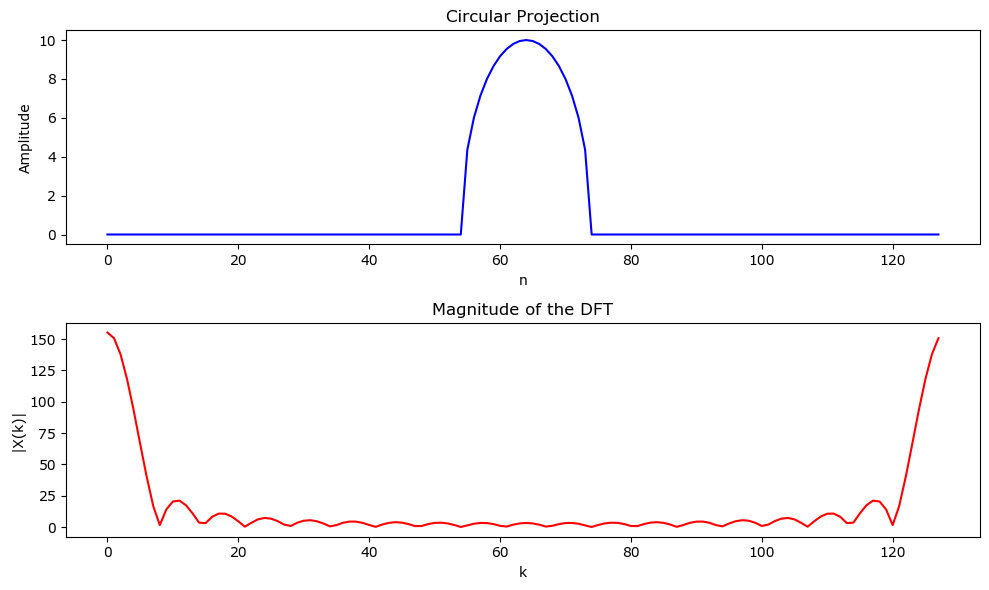

In [4]:
def circular_projection(N, radius):
    x = np.zeros(N)
    center = N // 2
    for i in range(N):
        if np.abs(i - center) <= radius:
            x[i] = np.sqrt(radius**2 - (i - center)**2)
    return x

# Parameters
N = 128  # Number of points in the signal
radius = 10 # Radius of the circle

# Create the circular projection
x = circular_projection(N, radius)

# Compute the DFT
X = DFT(x)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot the circular projection
axs[0].plot(np.arange(N), x, 'b')
axs[0].set_title('Circular Projection')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Amplitude')

# Plot the magnitude of the DFT
axs[1].plot(np.arange(N), np.abs(X), 'r')
axs[1].set_title('Magnitude of the DFT')
axs[1].set_xlabel('k')
axs[1].set_ylabel('|X(k)|')

plt.tight_layout()
plt.show()

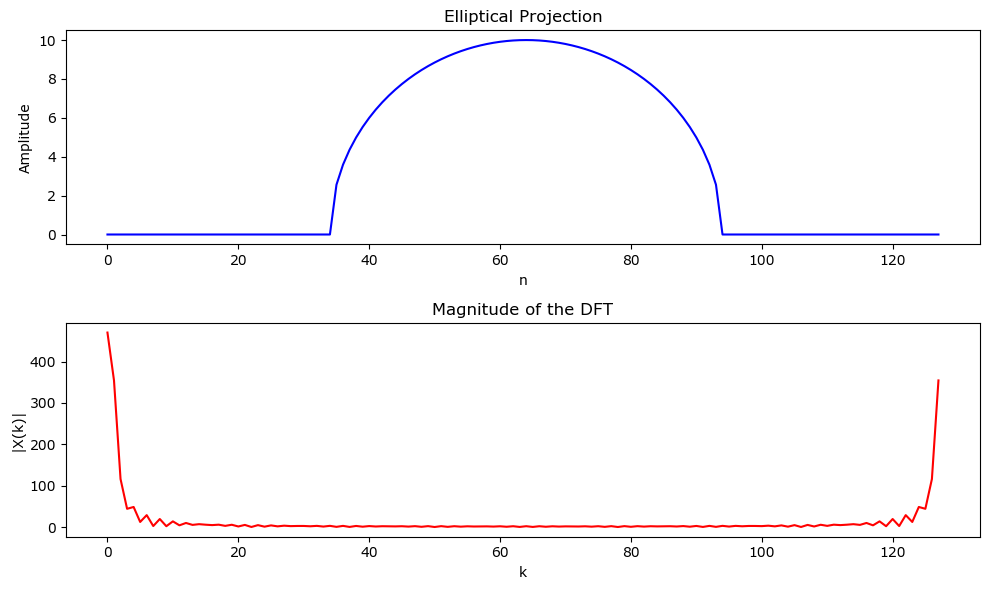

In [5]:
# Define the elliptical projection function
def elliptical_projection(N, a, b):
    x = np.zeros(N)
    center = N // 2
    for i in range(N):
        distance = np.abs(i - center)
        if distance <= a:
            x[i] = b * np.sqrt(1 - (distance / a)**2)
    return x

# Parameters
N = 128  # Number of points in the signal
a = 30  # Semi-major axis of the ellipse
b = 10  # Semi-minor axis of the ellipse

# Create the elliptical projection
x = elliptical_projection(N, a, b)

# Compute the DFT
X = DFT(x)

# Plot the results
fig, axs = plt.subplots(2, 1, figsize=(10, 6))

# Plot the elliptical projection
axs[0].plot(np.arange(N), x, 'b')
axs[0].set_title('Elliptical Projection')
axs[0].set_xlabel('n')
axs[0].set_ylabel('Amplitude')

# Plot the magnitude of the DFT
axs[1].plot(np.arange(N), np.abs(X), 'r')
axs[1].set_title('Magnitude of the DFT')
axs[1].set_xlabel('k')
axs[1].set_ylabel('|X(k)|')

plt.tight_layout()
plt.show()

In [6]:
x = np.linspace(-100, 100, 256)

for i in range(len(x)):
    if x[i] < -40 or x[i] > 40:
        x[i] = 0
    else:
        x[i] = np.sin(x[i])/x[i]

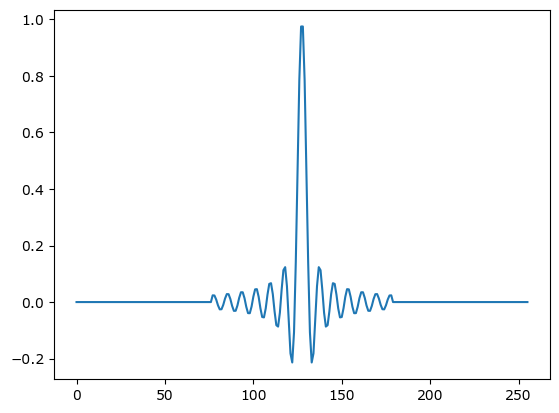

In [7]:
plt.plot(x)

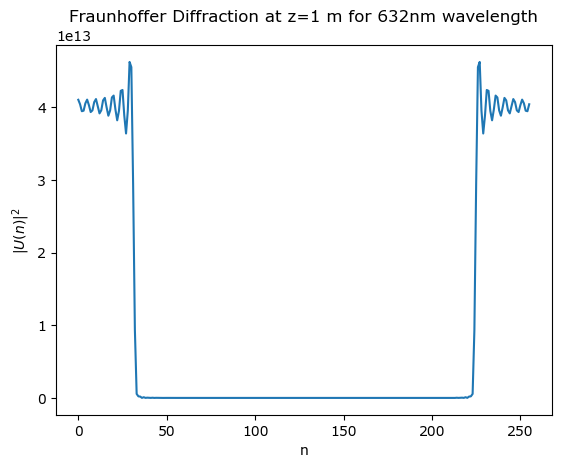

In [8]:
def fraunhoffer(x, l, z):
  U = np.zeros(len(x))
  X = DFT(x)

  for i in range(len(X)):
    U[i] = abs(X[i])**2 / (l*z)**2

  return U

l = 632e-9
z = 1

plt.plot(fraunhoffer(x, l, z))
plt.title("Fraunhoffer Diffraction at z=1 m for 632nm wavelength")
plt.xlabel("n")
plt.ylabel("$|U(n)|^2$")
plt.show()

In [9]:
# -------------------------------
# 2. Signal (pulse) definitions
# -------------------------------
def rectangular_pulse(t, width=1.0):
    return np.where(np.abs(t) <= width/2, 1.0, 0.0)

def gaussian_pulse(t, sigma=0.2):
    return np.exp(-t**2 / (2*sigma**2))

def triangular_pulse(t, width=1.0):
    return np.where(np.abs(t) <= width, 1 - np.abs(t)/width, 0.0)

def chirped_gaussian(t, sigma=0.2, chirp=10):
    return np.exp(-t**2 / (2*sigma**2)) * np.exp(1j*chirp*t**2)

def super_gaussian(t, sigma=0.2, order=4):
    return np.exp(- (t/sigma)**(2*order))

# Frequency axis helper
def freq_axis(N, dt):
    return np.fft.fftfreq(N, d=dt)

In [10]:
# -------------------------------
# 3. Optics applications
# Fraunhofer diffraction (via Fourier Transform of aperture)
# -------------------------------
def single_slit(x, width=0.1):
    return np.where(np.abs(x) <= width/2, 1.0, 0.0)

def double_slit(x, slit_width=0.05, slit_distance=0.2):
    return (np.where(np.abs(x+slit_distance/2) <= slit_width/2, 1.0, 0.0) +
            np.where(np.abs(x-slit_distance/2) <= slit_width/2, 1.0, 0.0))

def circular_aperture(X, Y, radius=0.1):
    R = np.sqrt(X**2 + Y**2)
    return np.where(R <= radius, 1.0, 0.0)

In [11]:
# -------------------------------
# 4. Main execution
# -------------------------------
# Time domain setup
N = 1024
t_max = 5
t = np.linspace(-t_max, t_max, N)
dt = t[1] - t[0]

# List of signals
signals = {
    "Rectangular": rectangular_pulse(t, width=1.0),
    "Gaussian": gaussian_pulse(t, sigma=0.5),
    "Triangular": triangular_pulse(t, width=1.0),
    "Chirped Gaussian": chirped_gaussian(t, sigma=0.5, chirp=5),
    "Super-Gaussian": super_gaussian(t, sigma=0.5, order=6),
}

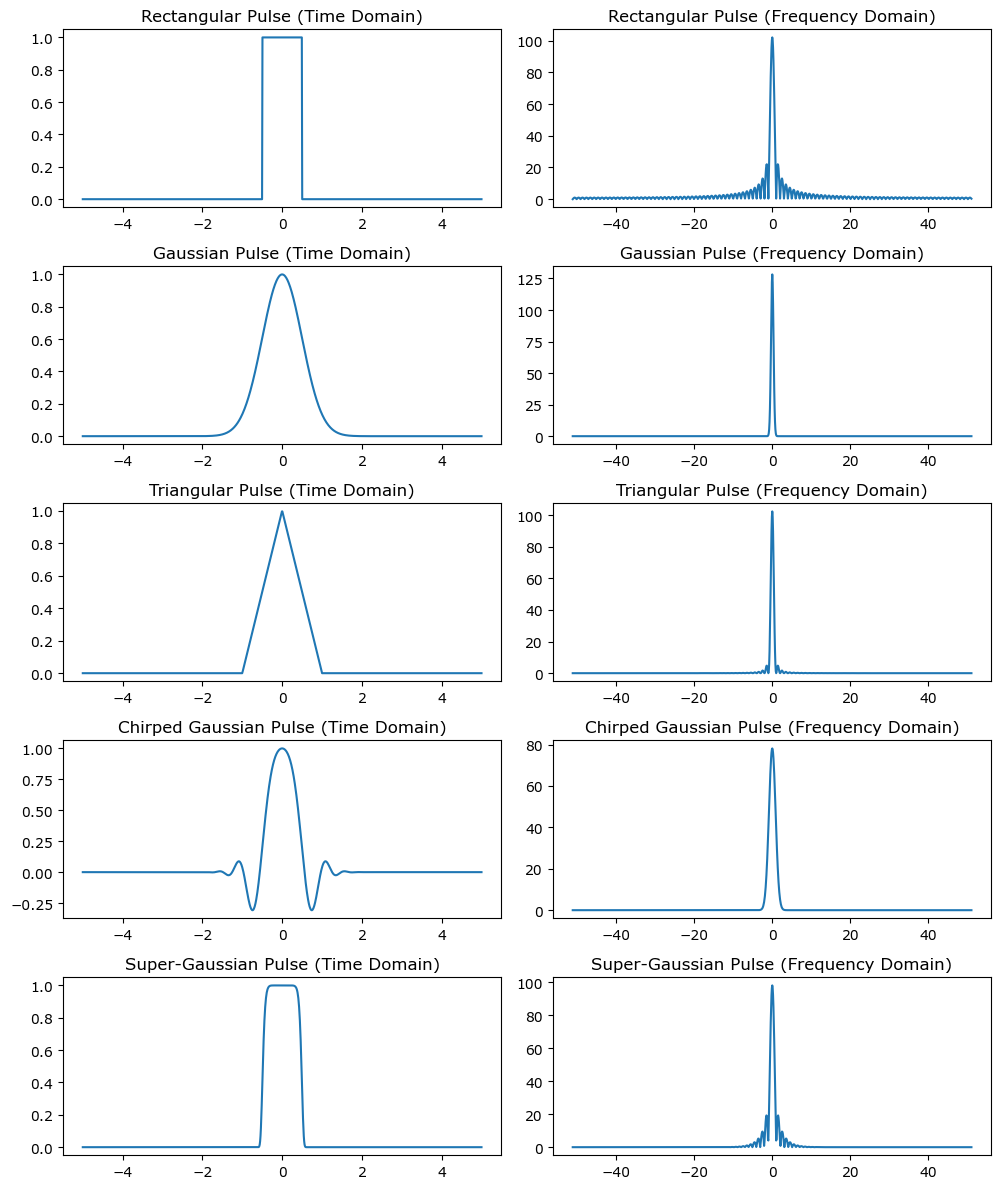

In [12]:
# Plot time and frequency domain for signals
fig, axs = plt.subplots(len(signals), 2, figsize=(10, 12))
for i, (name, sig) in enumerate(signals.items()):
    dft = DFT(sig)
    freqs = freq_axis(N, dt)
    
    axs[i, 0].plot(t, np.real(sig))
    axs[i, 0].set_title(f"{name} Pulse (Time Domain)")
    axs[i, 1].plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(dft)))
    axs[i, 1].set_title(f"{name} Pulse (Frequency Domain)")
plt.tight_layout()
plt.show()


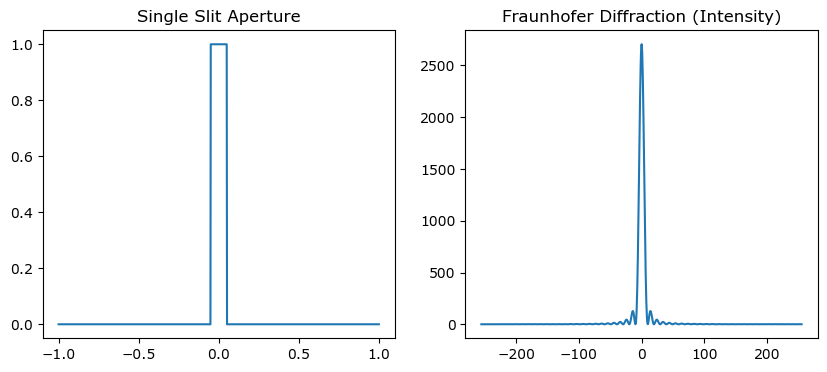

In [13]:
# -------------------------------
# Optics: Fraunhofer diffraction
# -------------------------------
# 1D single slit
x = np.linspace(-1, 1, N)
slit = single_slit(x, width=0.1)
slit_dft = DFT(slit)
freqs = freq_axis(N, x[1]-x[0])

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(x, slit)
plt.title("Single Slit Aperture")
plt.subplot(1,2,2)
plt.plot(np.fft.fftshift(freqs), np.fft.fftshift(np.abs(slit_dft))**2)
plt.title("Fraunhofer Diffraction (Intensity)")
plt.show()

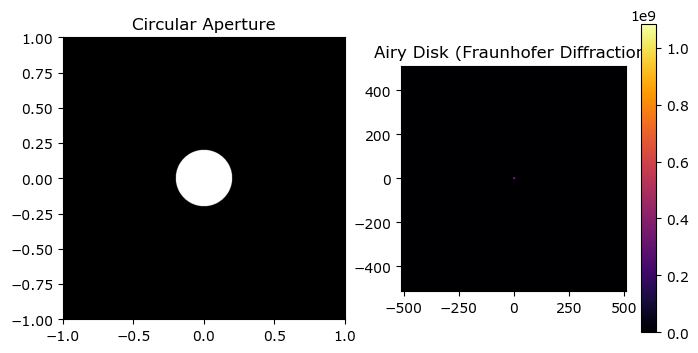

In [14]:
# 2D circular aperture
X, Y = np.meshgrid(np.linspace(-1,1,N), np.linspace(-1,1,N))
aperture = circular_aperture(X, Y, radius=0.2)
aperture_ft = np.fft.fftshift(np.fft.fft2(aperture))

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.imshow(aperture, extent=(-1,1,-1,1), cmap="gray")
plt.title("Circular Aperture")
plt.subplot(1,2,2)
plt.imshow(np.abs(aperture_ft)**2, extent=(-N/2,N/2,-N/2,N/2), cmap="inferno")
plt.title("Airy Disk (Fraunhofer Diffraction)")
plt.colorbar()
plt.show()


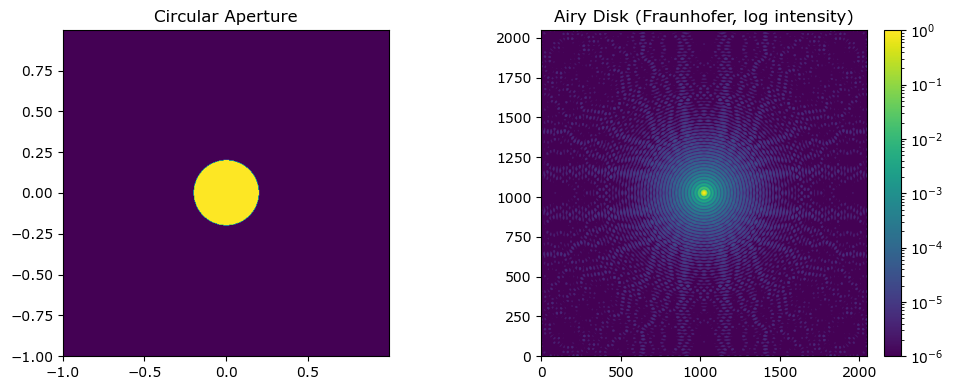

In [15]:
import matplotlib.colors as colors  # for LogNorm

# ---------- pupil (aperture) plane ----------
N = 512              # base grid
L = 2.0              # pupil-plane window size (arbitrary units)
dx = L / N
x = (np.arange(N) - N//2) * dx
X, Y = np.meshgrid(x, x)

D = 0.40             # circular aperture diameter (same units as L)
a = D/2
pupil = (X**2 + Y**2 <= a**2).astype(float)

# optional zero padding for smoother FT sampling
pad = 4
P = np.zeros((pad*N, pad*N))
s = pad*N//2 - N//2
P[s:s+N, s:s+N] = pupil

# ---------- Fraunhofer field (Fourier transform) ----------
# center -> FFT -> center
U = np.fft.fftshift(np.fft.fft2(np.fft.ifftshift(P)))
I = np.abs(U)**2
I /= I.max()  # normalize to peak = 1

# ---------- display ----------
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(pupil, extent=[x.min(), x.max(), x.min(), x.max()], origin='lower')
axs[0].set_title("Circular Aperture")

im = axs[1].imshow(
    I,
    norm=colors.LogNorm(vmin=1e-6, vmax=1.0),  # log scale reveals rings
    origin='lower'
)
axs[1].set_title("Airy Disk (Fraunhofer, log intensity)")
fig.colorbar(im, ax=axs[1], fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()


Predicted first zero (rho1) = 3.049175 cycles/unit-length


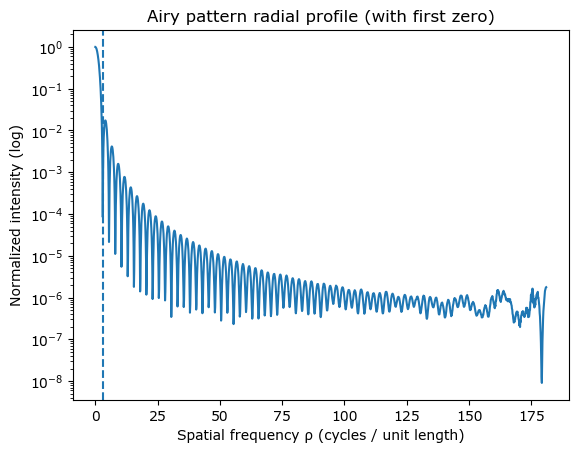

In [16]:
# spatial-frequency axes (cycles per unit length of pupil coords)
fx = np.fft.fftshift(np.fft.fftfreq(pad*N, d=dx))
FX, FY = np.meshgrid(fx, fx)
rho = np.sqrt(FX**2 + FY**2)

rho1 = 1.21967 / D  # predicted first zero
print("Predicted first zero (rho1) =", rho1, "cycles/unit-length")

# 1D radial profile (log) to see ring positions clearly
def radial_profile(img):
    y, x = np.indices(img.shape)
    c = np.array(img.shape)//2
    r = np.hypot(x - c[1], y - c[0]).astype(int)
    tbin = np.bincount(r.ravel(), img.ravel())
    nr = np.bincount(r.ravel())
    return tbin / np.maximum(nr, 1)

Irad = radial_profile(I)
# convert radial pixel index -> spatial frequency using df
df = fx[1] - fx[0]
r_pixels = np.arange(Irad.size)
rho_r = r_pixels * df

plt.figure()
plt.semilogy(rho_r, Irad / Irad.max())
plt.axvline(rho1, ls='--')  # predicted first zero
plt.xlabel("Spatial frequency ρ (cycles / unit length)")
plt.ylabel("Normalized intensity (log)")
plt.title("Airy pattern radial profile (with first zero)")
plt.show()
